# AdaBoost (Adaptive Boosting) 🚀

## Core Concept 🎯

**AdaBoost** is a boosting ensemble method that combines multiple weak learners sequentially, where each learner focuses on the mistakes of the previous ones. It **adaptively** adjusts the weights of training samples to emphasize misclassified instances.

> *"Turn weakness into strength by learning from mistakes!"*

---

## Key Intuition 💡

### The Philosophy
1. **Weak Learners**: Use simple models (e.g., decision stumps) that perform slightly better than random
2. **Sequential Learning**: Each model learns from the errors of previous models
3. **Adaptive Weighting**: Misclassified samples get higher weights in subsequent iterations
4. **Weighted Voting**: Final prediction combines all weak learners with different weights

### Mathematical Insight
$$\text{Strong Learner} = \sum_{t=1}^{T} \alpha_t \cdot h_t(x)$$

Where:
- $h_t(x)$ = weak learner at iteration $t$
- $\alpha_t$ = weight of weak learner $t$
- $T$ = total number of iterations

---

## AdaBoost Algorithm (SAMME) 🔄

### Step-by-Step Process

**Input**: Training set $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, $y_i \in \{-1, +1\}$

**Initialize**: Sample weights $w_1^{(i)} = \frac{1}{n}$ for $i = 1, 2, \ldots, n$

**For $t = 1, 2, \ldots, T$:**

### 1. Train Weak Learner
Train classifier $h_t$ on training data with weights $w_t$:
$$h_t = \arg\min_{h} \sum_{i=1}^{n} w_t^{(i)} \mathbb{I}[y_i \neq h(x_i)]$$

### 2. Calculate Weighted Error
$$\epsilon_t = \frac{\sum_{i=1}^{n} w_t^{(i)} \mathbb{I}[y_i \neq h_t(x_i)]}{\sum_{i=1}^{n} w_t^{(i)}}$$

**If $\epsilon_t \geq 0.5$**: Stop (weak learner assumption violated)

### 3. Calculate Learner Weight
$$\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$$

### 4. Update Sample Weights
$$w_{t+1}^{(i)} = w_t^{(i)} \exp(-\alpha_t y_i h_t(x_i))$$

**Normalization**:
$$w_{t+1}^{(i)} = \frac{w_{t+1}^{(i)}}{\sum_{j=1}^{n} w_{t+1}^{(j)}}$$

### 5. Final Prediction
$$H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)$$

---

## Mathematical Deep Dive 📐

### Weight Update Intuition

The weight update can be written as:
$$w_{t+1}^{(i)} = w_t^{(i)} \times \begin{cases}
e^{-\alpha_t} & \text{if } y_i = h_t(x_i) \text{ (correct)} \\
e^{+\alpha_t} & \text{if } y_i \neq h_t(x_i) \text{ (incorrect)}
\end{cases}$$

**Key Insight**: 
- **Correct predictions**: Weight decreases by factor $e^{-\alpha_t}$
- **Incorrect predictions**: Weight increases by factor $e^{+\alpha_t}$

### Learner Weight Analysis

$$\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$$

| Error Rate $\epsilon_t$ | Learner Weight $\alpha_t$ | Interpretation |
|------------------------|---------------------------|----------------|
| $0.5$ | $0$ | Random classifier (no contribution) |
| $0.4$ | $+0.203$ | Decent classifier (positive weight) |
| $0.1$ | $+1.099$ | Good classifier (high positive weight) |
| $0.01$ | $+2.197$ | Excellent classifier (very high weight) |

### Exponential Loss Function

AdaBoost minimizes the **exponential loss**:
$$L(y, f(x)) = e^{-y f(x)}$$

**Training Loss**:
$$\mathcal{L} = \sum_{i=1}^{n} \exp\left(-y_i \sum_{t=1}^{T} \alpha_t h_t(x_i)\right)$$

---

## SAMME vs SAMME.R Variants 🔄

### SAMME (Stagewise Additive Modeling using Multi-class Exponential loss)

**For Multi-class Problems** ($K$ classes):

**Learner Weight**:
$$\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right) + \ln(K - 1)$$

**Weight Update**:
$$w_{t+1}^{(i)} = w_t^{(i)} \exp\left(-\frac{K-1}{K} \alpha_t y_i h_t(x_i)\right)$$

### SAMME.R (Real AdaBoost)

**Uses Class Probabilities** instead of hard predictions:

**Weight Update**:
$$w_{t+1}^{(i)} = w_t^{(i)} \exp\left(-\frac{K-1}{K} \sum_{k=1}^{K} y_i^{(k)} p_t^{(k)}(x_i)\right)$$

Where $p_t^{(k)}(x_i)$ is the probability of class $k$ for sample $i$.

---

## Implementation Details 💻

### Scikit-learn Usage

```python
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Classification
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stumps
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)

ada_clf.fit(X_train, y_train)
predictions = ada_clf.predict(X_test)
```

### Manual Implementation

```python
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoostBinary:
    def __init__(self, n_estimators=50, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.estimator_weights = []
        self.estimator_errors = []
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        # Initialize weights
        sample_weights = np.ones(n_samples) / n_samples
        
        for t in range(self.n_estimators):
            # Train weak learner
            estimator = DecisionTreeClassifier(max_depth=1)
            estimator.fit(X, y, sample_weight=sample_weights)
            
            # Make predictions
            predictions = estimator.predict(X)
            
            # Calculate weighted error
            incorrect = predictions != y
            weighted_error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)
            
            # Stop if error is too high
            if weighted_error >= 0.5:
                break
            
            # Calculate estimator weight
            alpha = 0.5 * np.log((1 - weighted_error) / weighted_error)
            alpha *= self.learning_rate
            
            # Update sample weights
            sample_weights *= np.exp(-alpha * y * predictions)
            sample_weights /= np.sum(sample_weights)  # Normalize
            
            # Store estimator and weight
            self.estimators.append(estimator)
            self.estimator_weights.append(alpha)
            self.estimator_errors.append(weighted_error)
    
    def predict(self, X):
        # Weighted voting
        predictions = np.zeros(X.shape[0])
        
        for estimator, weight in zip(self.estimators, self.estimator_weights):
            predictions += weight * estimator.predict(X)
        
        return np.sign(predictions)
```

---

## Key Hyperparameters 🎛️

### **n_estimators**
**Number of weak learners to train**

| Value | Effect | Use Case |
|-------|--------|----------|
| **50-100** | Standard | Most problems |
| **100-500** | Better performance | Complex datasets |
| **500+** | Potential overfitting | Use with caution |

### **learning_rate** (shrinkage)
**Contribution of each weak learner**

$$\alpha_t^{\text{final}} = \text{learning\_rate} \times \alpha_t$$

| Value | Effect | Trade-off |
|-------|--------|-----------|
| **1.0** | Default, no shrinkage | Fast convergence |
| **0.1-0.5** | Conservative learning | Better generalization |
| **< 0.1** | Very slow learning | May need more estimators |

### **algorithm** 
**AdaBoost variant to use**

| Algorithm | Use Case | Characteristics |
|-----------|----------|----------------|
| **'SAMME'** | Discrete predictions | Traditional AdaBoost |
| **'SAMME.R'** | Probability estimates | Often faster convergence |

### **base_estimator**
**Weak learner to use**

| Estimator | Configuration | Best For |
|-----------|---------------|----------|
| **Decision Stump** | `max_depth=1` | Classic choice, interpretable |
| **Shallow Tree** | `max_depth=2-3` | Slightly more complex patterns |
| **Linear Model** | Various | When linear separability exists |

---

## Advantages ✅

### 🎯 **Theoretical Strengths**
- **Guaranteed Improvement**: Each iteration reduces training error
- **Exponential Convergence**: Training error decreases exponentially
- **Adaptive**: Automatically focuses on hard examples
- **Versatile**: Works with any weak learner

### 🚀 **Practical Benefits**
- **Simple Implementation**: Easy to understand and code
- **Good Performance**: Often competitive with complex methods
- **Feature Selection**: Implicitly performs feature selection
- **Interpretable**: Can analyze contribution of each weak learner

### 📊 **Statistical Properties**
- **Bias Reduction**: Reduces both bias and variance
- **Consistency**: Converges to optimal classifier under conditions
- **Robustness**: Less prone to overfitting than individual complex models

---

## Disadvantages ❌

### ⚠️ **Sensitivity Issues**
- **Noise Sensitivity**: Very sensitive to outliers and noise
- **Overfitting**: Can overfit with noisy data or too many iterations
- **Requires Weak Learners**: Needs base learners that are better than random

### 🐌 **Computational Concerns**
- **Sequential**: Cannot parallelize training (unlike Random Forest)
- **Memory Usage**: Stores all weak learners
- **Slow Convergence**: May need many iterations for complex problems

### 📉 **Data Dependencies**
- **Imbalanced Data**: Can focus too much on minority class
- **High Dimensionality**: May struggle with very high-dimensional data
- **Small Datasets**: Prone to overfitting on small datasets

---

## AdaBoost vs Other Ensembles 🆚

| Method | Training | Overfitting | Noise Sensitivity | Parallelization |
|--------|----------|-------------|-------------------|-----------------|
| **AdaBoost** | Sequential | Moderate | High | No |
| **Random Forest** | Parallel | Low | Low | Yes |
| **Gradient Boosting** | Sequential | High | Medium | Limited |
| **Bagging** | Parallel | Low | Low | Yes |

### Bias-Variance Decomposition

**AdaBoost**:
- **Bias**: ↓ Decreases (combines weak learners)
- **Variance**: ↑ Increases (focuses on hard examples)

**Random Forest**:
- **Bias**: ↑ Slight increase (averaging)
- **Variance**: ↓ Decreases significantly (independent trees)

---

## Advanced Topics 🚀

### 1. **Multi-class AdaBoost**

**One-vs-Rest Strategy**:
```python
from sklearn.multiclass import OneVsRestClassifier

multi_ada = OneVsRestClassifier(
    AdaBoostClassifier(n_estimators=50)
)
```

**Direct Multi-class (SAMME)**:
```python
ada_multi = AdaBoostClassifier(
    algorithm='SAMME',
    n_estimators=50
)
```

### 2. **AdaBoost for Regression**

**AdaBoost.R2 Algorithm**:

**Error Calculation**:
$$\epsilon_t = \frac{\sum_{i=1}^{n} w_t^{(i)} \left(\frac{|y_i - h_t(x_i)|}{\max_i |y_i - h_t(x_i)|}\right)^p}{\sum_{i=1}^{n} w_t^{(i)}}$$

Where $p$ is typically 1 (linear) or 2 (quadratic).

```python
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    learning_rate=1.0,
    loss='linear'  # or 'square', 'exponential'
)
```

### 3. **Early Stopping**

```python
from sklearn.model_selection import validation_curve

def find_optimal_estimators(X, y, max_estimators=200):
    estimator_range = np.arange(10, max_estimators, 10)
    
    train_scores, val_scores = validation_curve(
        AdaBoostClassifier(),
        X, y,
        param_name='n_estimators',
        param_range=estimator_range,
        cv=5,
        scoring='accuracy'
    )
    
    # Find optimal number of estimators
    optimal_n = estimator_range[np.argmax(val_scores.mean(axis=1))]
    return optimal_n
```

---

## Practical Tips 💡

### ✅ **Best Practices**

1. **Start Simple**: Begin with decision stumps (`max_depth=1`)
2. **Monitor Overfitting**: Use validation curves to track performance
3. **Handle Noise**: Clean data before applying AdaBoost
4. **Balance Classes**: Consider class weights for imbalanced data
5. **Tune Carefully**: Focus on `n_estimators` and `learning_rate`

### 🎯 **Hyperparameter Tuning Strategy**

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(
    AdaBoostClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)
```

### ⚠️ **Common Pitfalls**

1. **Noisy Data**: AdaBoost amplifies noise → clean data first
2. **Too Many Estimators**: Can lead to overfitting → use validation
3. **Weak Base Learner**: Ensure base learner is better than random
4. **Imbalanced Data**: May focus too much on minority class → use class weights

---

## Visualization Techniques 📊

### 1. **Learning Curves**

```python
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y):
    train_errors = []
    val_errors = []
    
    for n_est in range(1, estimator.n_estimators + 1):
        # Get predictions from first n_est estimators
        train_pred = estimator.staged_predict(X)
        val_pred = estimator.staged_predict(X_val)
        
        train_errors.append(accuracy_score(y, next(train_pred)))
        val_errors.append(accuracy_score(y_val, next(val_pred)))
    
    plt.plot(train_errors, label='Training')
    plt.plot(val_errors, label='Validation')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('AdaBoost Learning Curve')
```

### 2. **Estimator Weights**

```python
def plot_estimator_weights(ada_clf):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(ada_clf.estimator_weights_)), ada_clf.estimator_weights_)
    plt.xlabel('Estimator Index')
    plt.ylabel('Weight')
    plt.title('AdaBoost Estimator Weights')
    plt.show()
```

### 3. **Error Evolution**

```python
def plot_error_evolution(ada_clf):
    plt.figure(figsize=(10, 6))
    plt.plot(ada_clf.estimator_errors_, 'b-', label='Training Error')
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random Classifier')
    plt.xlabel('Iteration')
    plt.ylabel('Weighted Error')
    plt.title('AdaBoost Error Evolution')
    plt.legend()
    plt.show()
```

---

## When to Use AdaBoost 🎯

### ✅ **Good For:**
- **Binary Classification**: Originally designed for binary problems
- **Tabular Data**: Works well with structured data
- **Interpretability**: When you need to understand weak learner contributions
- **Moderate Noise**: Clean or lightly noisy datasets
- **Feature Selection**: Implicit feature selection through weak learners

### ❌ **Avoid When:**
- **Very Noisy Data**: AdaBoost amplifies noise
- **Large Datasets**: Sequential training doesn't scale well
- **Real-time Prediction**: Multiple weak learners increase latency
- **High-dimensional Data**: May struggle with curse of dimensionality
- **Highly Imbalanced Data**: Without proper class balancing

---

## Theoretical Foundations 🧠

### PAC-Bayesian Theory

**Generalization Bound**:
$$P(\text{test error} \leq \text{training error} + \sqrt{\frac{\ln(2/\delta)}{2n}}) \geq 1 - \delta$$

### Boosting Theory

**Weak Learning Assumption**: Each weak learner has error $\epsilon_t < 0.5$

**Training Error Bound**:
$$\text{Training Error} \leq \prod_{t=1}^{T} 2\sqrt{\epsilon_t(1-\epsilon_t)}$$

**Exponential Decrease**: If $\epsilon_t \leq 0.5 - \gamma$ for all $t$:
$$\text{Training Error} \leq e^{-2\gamma^2 T}$$

### Margin Theory

**Margin** for sample $i$:
$$\rho_i = \frac{y_i \sum_{t=1}^{T} \alpha_t h_t(x_i)}{\sum_{t=1}^{T} \alpha_t}$$

**Generalization**: Larger margins → better generalization

Weak learner is a ML model which has an accuracy of just over 50%. Adaboost uses these weak learners

Decision Stumps are decision trees that have a max depth of 1. It is an example of weak learner

In adaboost classifiers, the +ve class is 1 and the -ve class is -1 (unlike 0 in other classifiers)

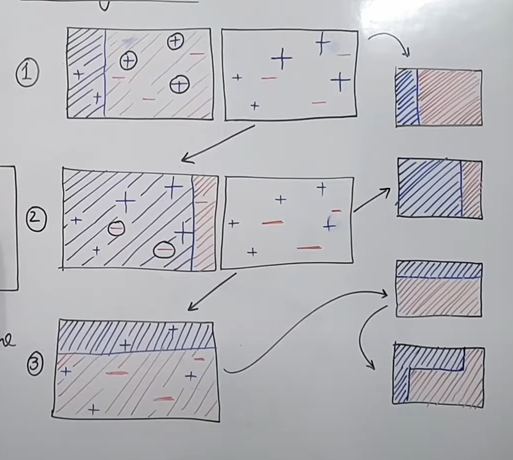

Adaboost is a stage wise additive method

First, we fit a decision stump to the data. We then see what data we erred on. We use a technique called upsampling and focus on that data. We then calculate the weight of the data

Stage 2, we again fit a decision stump (this time it will correctly classify the erred points). Again we calculate a weight alpha and finally calculate the final output of the model as 

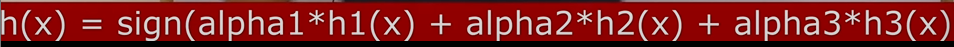

sign means if the sum is +ve it will return 1 else -1

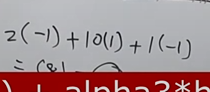

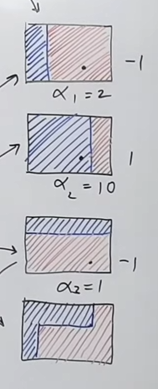